In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('degrees-that-pay-back.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Undergraduate Major                                50 non-null     object 
 1   Starting Median Salary                             50 non-null     object 
 2   Mid-Career Median Salary                           50 non-null     object 
 3   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 4   Mid-Career 10th Percentile Salary                  50 non-null     object 
 5   Mid-Career 25th Percentile Salary                  50 non-null     object 
 6   Mid-Career 75th Percentile Salary                  50 non-null     object 
 7   Mid-Career 90th Percentile Salary                  50 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB
None


In [2]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


<Axes: xlabel='x', ylabel='y'>

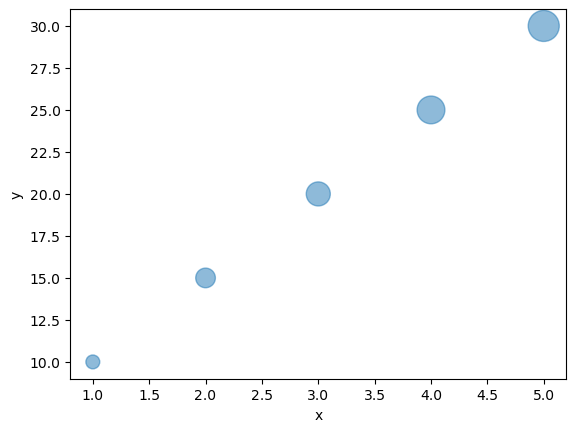

In [3]:
data = {
    'x': [1, 2, 3, 4, 5],
    'y': [10, 15, 20, 25, 30],
    'size': [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)
df.plot(kind='scatter', x='x', y='y', s='size', alpha=0.5)

/Users/future/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


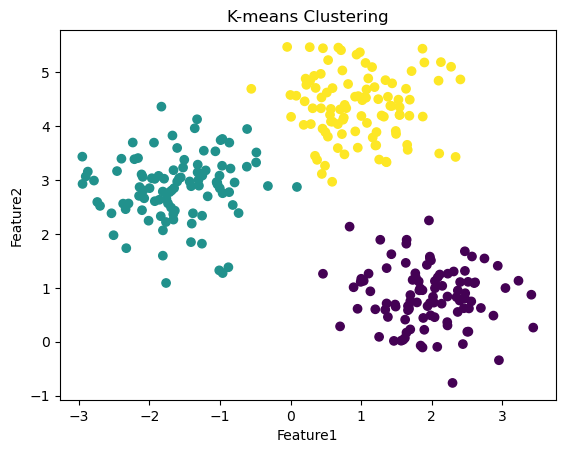

In [4]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate mock data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Convert the data into a DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Choose the number of clusters (k)
k = 3

# Initialize k-means model
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to your dataset
df['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('K-means Clustering')
plt.show()

Join two DFs, sort on a column, and ensure you're getting the data you expect.

- Join two DFs
- Sort on a column
- Remove duplicates
- Filter for only two columns
- Create two columns from one by splitting a string column.

In [63]:
df1 = pd.read_csv('degrees-that-pay-back.csv')
df2 = pd.read_csv('degrees-that-pay-back.csv')

# Join two DFs
df_combined = pd.concat([df1, df2])

# Sort on column
df_combined_sorted = df_combined.sort_values(by="Undergraduate Major", ascending=True)
df_combined_sorted.reset_index(drop=True, inplace=True)

# Remove duplicates
cleansed = df_combined_sorted.drop_duplicates(subset=['Undergraduate Major'], keep='first')

# Filter for only two columns
df_final = cleansed[['Undergraduate Major', 'Starting Median Salary']]

# Create two columns from one by splitting a string column.
df_final[['First', 'Second']] = df_final['Undergraduate Major'].str.split(' ', n=1, expand=True)

print(df_final[['First', 'Second']])


             First                     Second
0       Accounting                       None
2        Aerospace         Engineering GOGOGO
4      Agriculture                       None
6     Anthropology                       None
8     Architecture                       None
10             Art                    History
12         Biology                       None
14        Business                 Management
16        Chemical                Engineering
18       Chemistry                       None
20           Civil                Engineering
22  Communications                       None
24        Computer                Engineering
26        Computer                    Science
28    Construction                       None
30        Criminal                    Justice
32           Drama                       None
34       Economics                       None
36       Education                       None
38      Electrical                Engineering
40         English                

/var/folders/zq/2b6tczyj6mj2p9dxk7_rxtjm0000gn/T/ipykernel_86635/1754299072.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[['First', 'Second']] = df_final['Undergraduate Major'].str.split(' ', n=1, expand=True)
/var/folders/zq/2b6tczyj6mj2p9dxk7_rxtjm0000gn/T/ipykernel_86635/1754299072.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[['First', 'Second']] = df_final['Undergraduate Major'].str.split(' ', n=1, expand=True)
